In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("fish_data.csv")

In [3]:
df.dtypes

species       object
length       float64
weight       float64
w_l_ratio    float64
dtype: object

In [4]:
df.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [5]:
print(df.shape)

(4080, 4)


In [6]:
df.duplicated().sum()

np.int64(109)

In [7]:
df=df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    3971 non-null   object 
 1   length     3971 non-null   float64
 2   weight     3971 non-null   float64
 3   w_l_ratio  3971 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.1+ KB


In [9]:
df.species.value_counts()

species
Setipinna taty            476
Anabas testudineus        462
Otolithoides biauritus    456
Polynemus paradiseus      454
Pethia conchonius         454
Sillaginopsis panijus     429
Otolithoides pama         428
Coilia dussumieri         409
Puntius lateristriga      403
Name: count, dtype: int64

In [10]:
X = df.drop('species', axis=1)
y = df.species

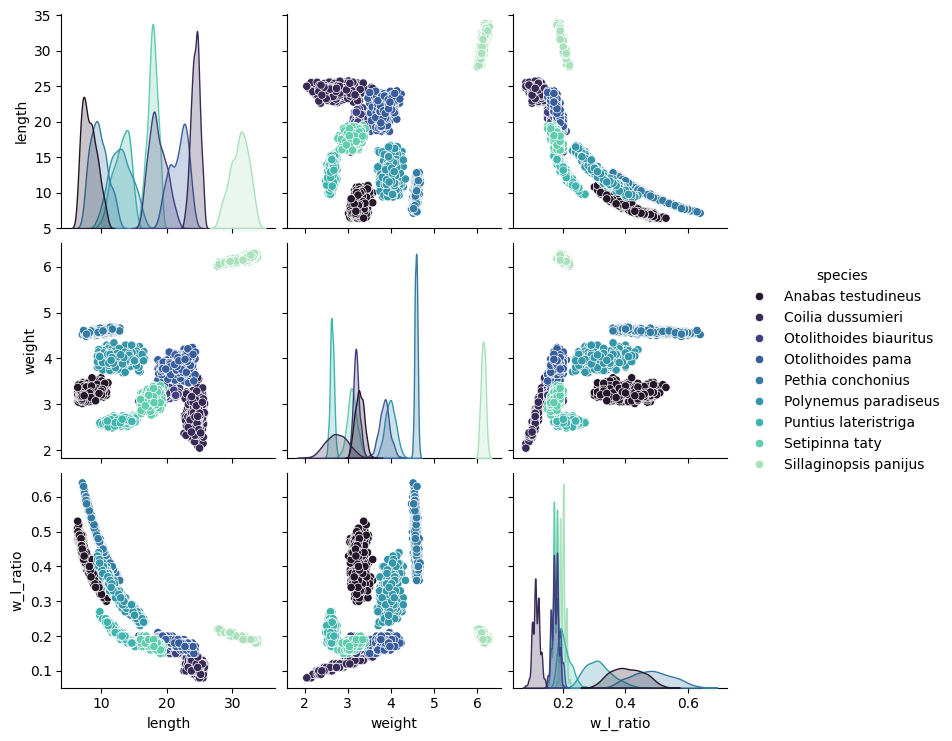

In [11]:
sns.pairplot(df, hue='species', palette="mako")
plt.show()

<Axes: title={'center': 'Countplot of Species listed'}, xlabel='Fish Species', ylabel='Count'>

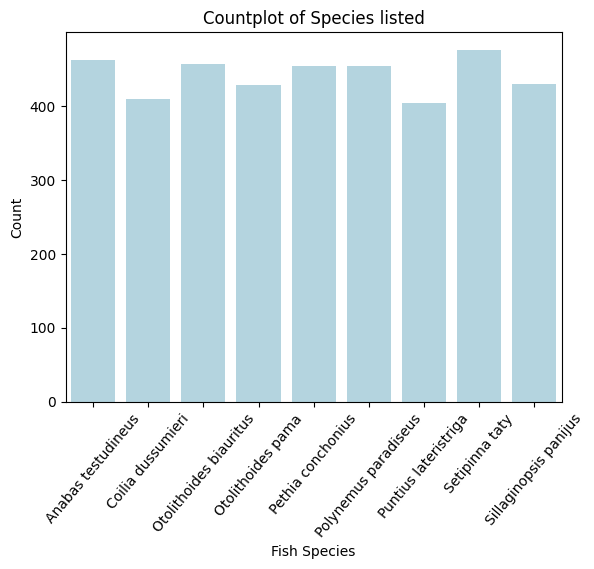

In [12]:
plt.xticks(rotation=50)
plt.ylabel('Count')
plt.xlabel('Fish Species')
plt.title('Countplot of Species listed')

sns.countplot(x='species', data=df, color="lightblue")

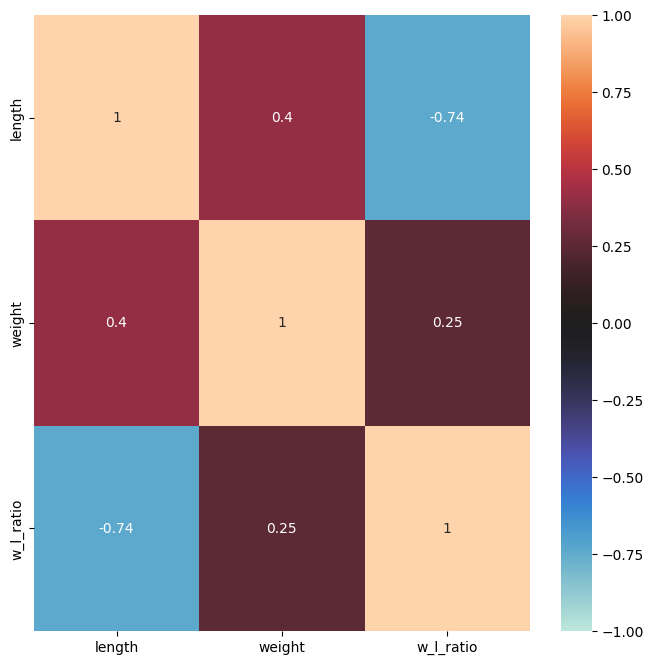

In [13]:
corr_df= df.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(corr_df, center=0, vmin=-1, annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

#scaling
scaler = MinMaxScaler()
X_scl = scaler.fit_transform(X)

#preparing kmeans and prediction labeling per fish species
kmeans = KMeans(n_clusters=9, max_iter=100)
y_km = kmeans.fit_predict(X_scl)

In [15]:
#more clustering types for later
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
#create xtransformed
X_trn = scaler.inverse_transform(X_scl)

ari = adjusted_rand_score(y, y_km)
nmi = normalized_mutual_info_score(y, y_km)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')

Adjusted Rand Index (ARI): 0.8091675595537189
Normalized Mutual Information (NMI): 0.9114320669142737


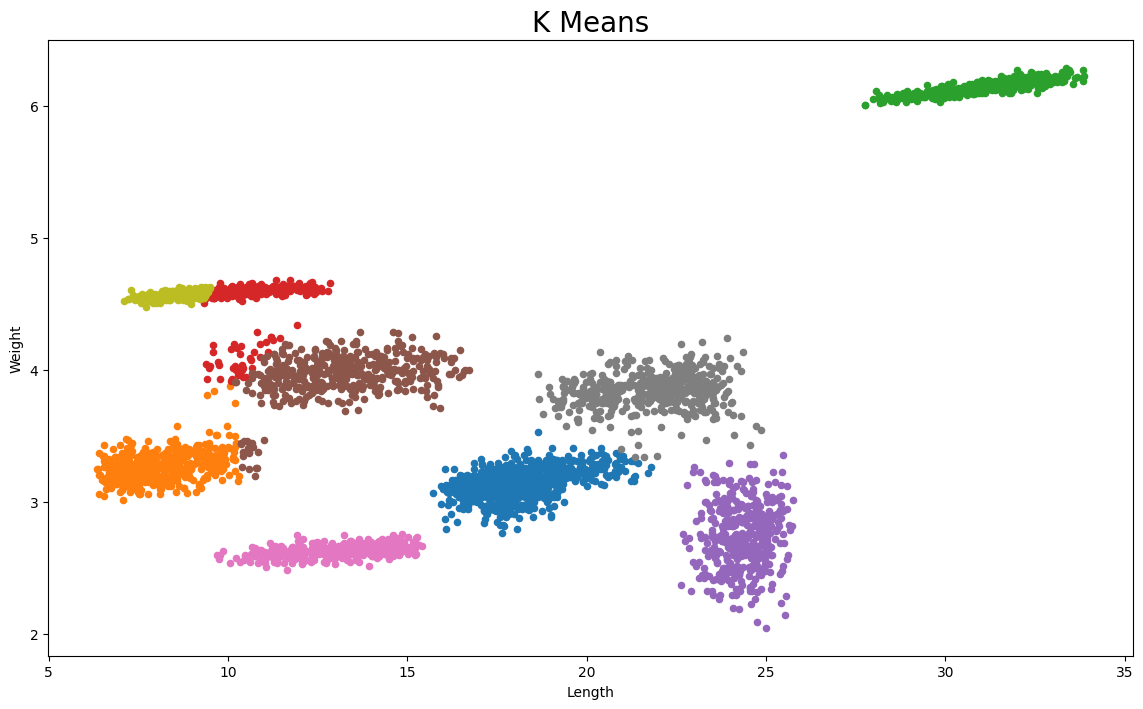

In [16]:
#Kmeans ver
from matplotlib.patches import Patch

plt.figure(figsize= (14,8))

for i in range(9):
    plt.scatter(X_trn[y_km == i, 0], X_trn[y_km == i, 1], s=20)

plt.title('K Means', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

In [17]:
agg_clustering = AgglomerativeClustering(n_clusters=9)

y_agg = agg_clustering.fit_predict(X_scl)

ari = adjusted_rand_score(y, y_agg)
nmi = normalized_mutual_info_score(y, y_agg)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')

Adjusted Rand Index (ARI): 0.8395964047422195
Normalized Mutual Information (NMI): 0.9418809545140551


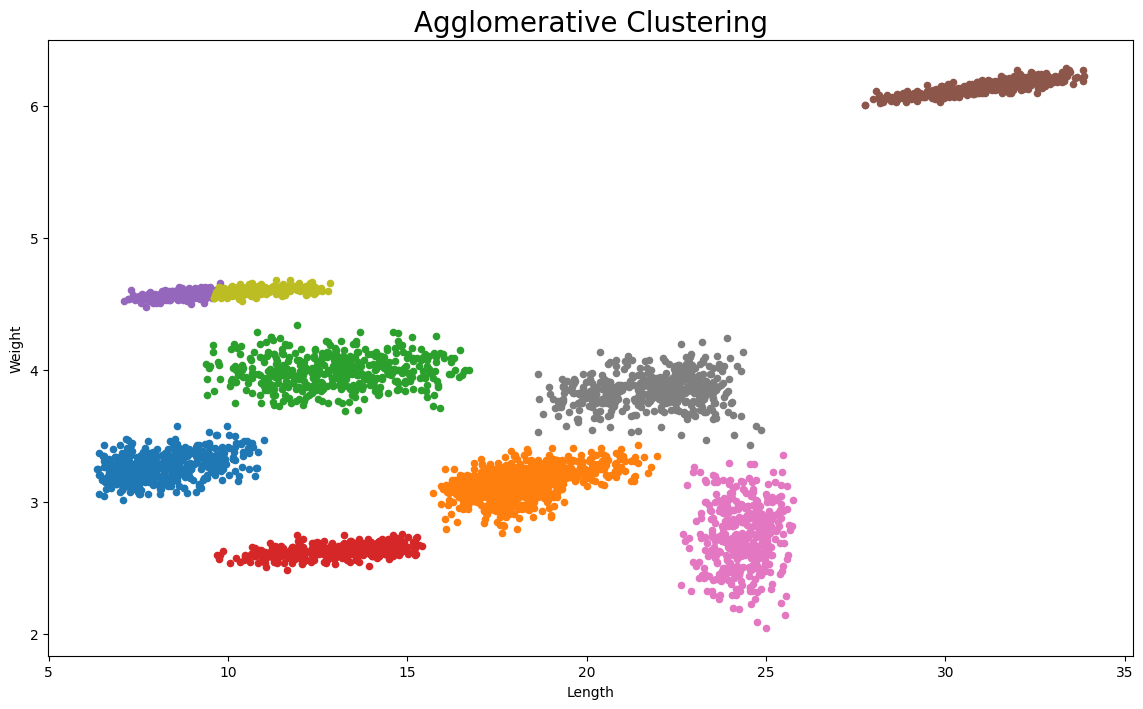

In [18]:
#Agg ver
plt.figure(figsize=(14,8))

for i in range(9):
    plt.scatter(X_trn[y_agg == i, 0], X_trn[y_agg == i, 1], s=20)

plt.title('Agglomerative Clustering', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

In [19]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=9, random_state=101)


In [40]:
dbscan = DBSCAN(eps=0.03, min_samples=5)

y_dbscan = dbscan.fit_predict(X_scl)

ari = adjusted_rand_score(y, y_dbscan)
nmi = normalized_mutual_info_score(y, y_dbscan)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')

Adjusted Rand Index (ARI): 0.8702898981025134
Normalized Mutual Information (NMI): 0.9556934731147869


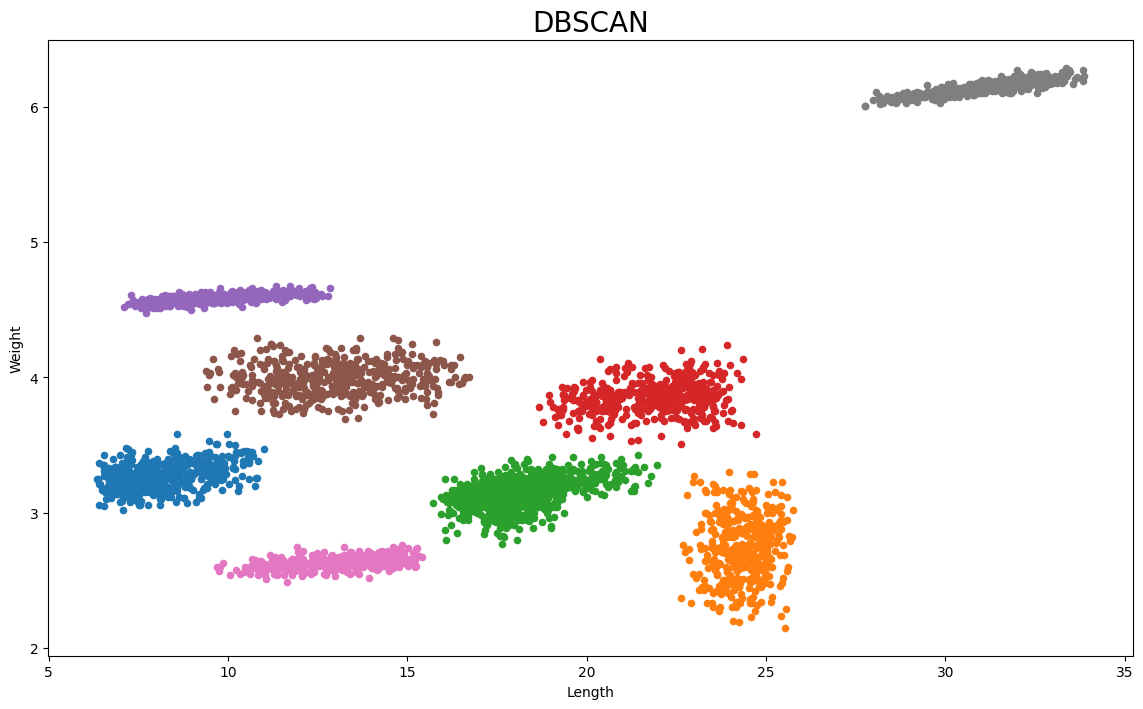

In [41]:
#dbscan ver
plt.figure(figsize=(14,8))

for i in range(9):
    plt.scatter(X_trn[y_dbscan == i, 0], X_trn[y_dbscan == i, 1], s=20)

plt.title('DBSCAN', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

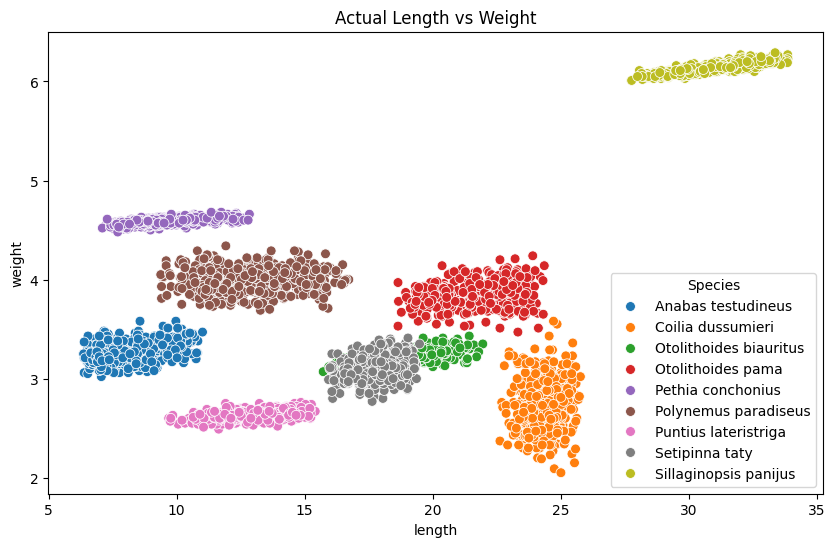

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'length', y = 'weight', hue = 'species', s = 50)
plt.title('Actual Length vs Weight')
plt.legend(title = 'Species')
plt.show()